Mounted at /content/drive


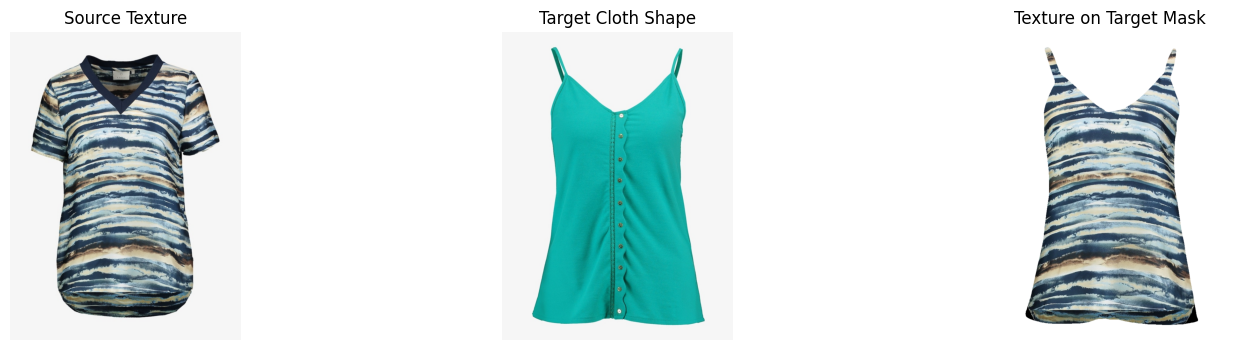

In [2]:
!pip install opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

src_img_path  = '/content/drive/MyDrive/12252_00.jpg'
src_mask_path = '/content/drive/MyDrive/cloth-mask/12252_00.jpg'
tgt_img_path  = '/content/drive/MyDrive/02141_00.jpg'
tgt_mask_path = '/content/drive/MyDrive/cloth-mask/02141_00.jpg'

src_img  = cv2.imread(src_img_path)
src_mask = cv2.imread(src_mask_path, cv2.IMREAD_GRAYSCALE)
tgt_img  = cv2.imread(tgt_img_path)
tgt_mask = cv2.imread(tgt_mask_path, cv2.IMREAD_GRAYSCALE)

_, src_mask = cv2.threshold(src_mask, 127, 255, cv2.THRESH_BINARY)
_, tgt_mask = cv2.threshold(tgt_mask, 127, 255, cv2.THRESH_BINARY)

src_bb = cv2.boundingRect(src_mask)
cropped_texture = src_img[src_bb[1]:src_bb[1]+src_bb[3], src_bb[0]:src_bb[0]+src_bb[2]]
cropped_texture_mask = src_mask[src_bb[1]:src_bb[1]+src_bb[3], src_bb[0]:src_bb[0]+src_bb[2]]
cropped_texture = cv2.bitwise_and(cropped_texture, cropped_texture, mask=cropped_texture_mask)

target_mask_coords = cv2.boundingRect(tgt_mask)
tg_h, tg_w = tgt_mask.shape

resized_texture = cv2.resize(cropped_texture, (tg_w, tg_h), interpolation=cv2.INTER_CUBIC)

tgt_mask_3c = cv2.merge([tgt_mask, tgt_mask, tgt_mask])
texture_on_shape = np.zeros_like(tgt_img)
texture_on_shape[tgt_mask_3c > 0] = resized_texture[tgt_mask_3c > 0]

result = np.ones_like(tgt_img) * 255
result[tgt_mask_3c > 0] = texture_on_shape[tgt_mask_3c > 0]

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title('Source Texture')
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)); plt.axis('off')
plt.subplot(1,3,2)
plt.title('Target Cloth Shape')
plt.imshow(cv2.cvtColor(tgt_img, cv2.COLOR_BGR2RGB)); plt.axis('off')
plt.subplot(1,3,3)
plt.title('Texture on Target Mask')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)); plt.axis('off')
plt.show()
